In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('/content/sample_data/Social Media Engagement Dataset.csv')
df.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


In [28]:
df.isnull().sum()
df.dropna(inplace=True)

In [29]:
def count_items(text):
    if pd.isna(text) or not isinstance(text, str) or text.strip() == '':
        return 0
    return len(text.split(', '))

df['mentions_count'] = df['mentions'].apply(count_items)
df['hashtags_count'] = df['hashtags'].apply(count_items)
df['total_engagement'] = df['mentions_count'] + df['comments_count'] + df['hashtags_count']
df['engagement_rate'] = (df['total_engagement'] / df['impressions']) * 100

In [30]:
df.groupby('platform')['total_engagement'].mean().sort_values(ascending=False)


,total_engagement
platform,
YouTube,516.758831
Twitter,514.840100
Reddit,511.001871
Facebook,507.123279
Instagram,496.131889


In [31]:
df.groupby('day_of_week')['total_engagement'].mean()


,total_engagement
day_of_week,
Friday,504.992181
Monday,504.075809
Saturday,499.388601
Sunday,509.667832
Thursday,514.539894
Tuesday,525.191489
Wednesday,507.099490


In [32]:
df.groupby('timestamp')['total_engagement'].mean()


,total_engagement
timestamp,
2024-05-01 01:04:04,559.0
2024-05-01 01:35:53,816.0
2024-05-01 02:24:32,287.0
2024-05-01 04:57:30,646.0
2024-05-01 06:08:47,397.0
...,...
2025-04-30 15:54:26,673.0
2025-04-30 16:47:42,570.0
2025-04-30 17:13:20,140.0


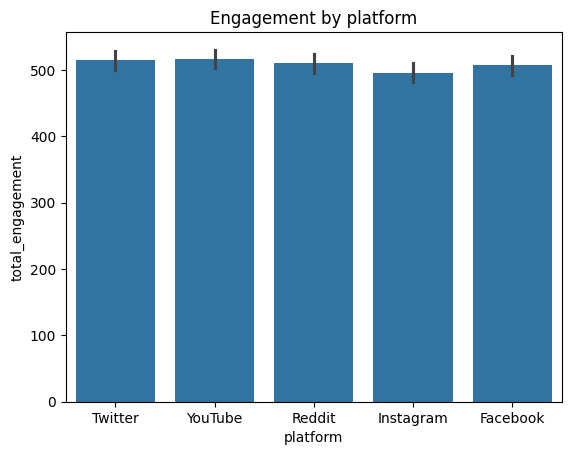

In [33]:
sns.barplot(x='platform', y='total_engagement', data=df)
plt.title("Engagement by platform")
plt.show()


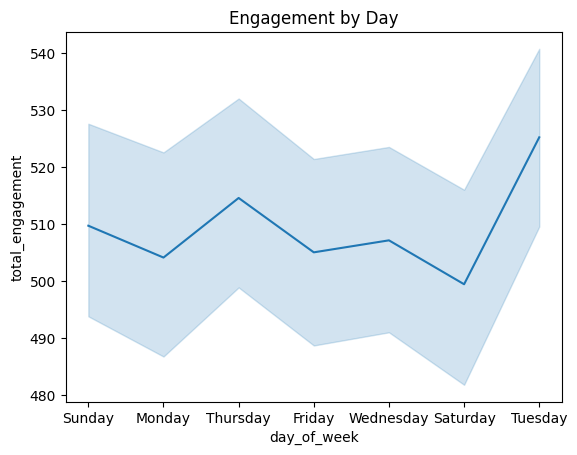

In [34]:
sns.lineplot(x='day_of_week', y='total_engagement', data=df)
plt.title("Engagement by Day")
plt.show()
